<img align="left" src="https://lever-client-logos.s3.amazonaws.com/864372b1-534c-480e-acd5-9711f850815c-1524247202159.png" width=200>
<br></br>

# Neural Network Framework (Keras)

## *Data Science Unit 4 Sprint 2 Assignmnet 3*

## Use the Keras Library to build a Multi-Layer Perceptron Model on the Boston Housing dataset

- The Boston Housing dataset comes with the Keras library so use Keras to import it into your notebook. 
- Normalize the data (all features should have roughly the same scale)
- Import the type of model and layers that you will need from Keras.
- Instantiate a model object and use `model.add()` to add layers to your model
- Since this is a regression model you will have a single output node in the final layer.
- Use activation functions that are appropriate for this task
- Compile your model
- Fit your model and report its accuracy in terms of Mean Squared Error
- Use the history object that is returned from model.fit to make graphs of the model's loss or train/validation accuracies by epoch. 
- Run this same data through a linear regression model. Which achieves higher accuracy?
- Do a little bit of feature engineering and see how that affects your neural network model. (you will need to change your model to accept more inputs)
- After feature engineering, which model sees a greater accuracy boost due to the new features?

In [159]:
"""
Import Statment:
"""
from tensorflow import keras
import matplotlib.pyplot as plt
from tensorflow.keras.layers import Dense
from tensorflow.keras.models import Sequential
from sklearn.metrics import mean_squared_error
from tensorflow.keras.utils import to_categorical
from sklearn.linear_model import LinearRegression
from tensorflow.keras.datasets import fashion_mnist

In [160]:
from keras.datasets import boston_housing

(X_train, y_train), (X_test, y_test) = boston_housing.load_data()

In [161]:
print(f'Training Data: {X_train.shape}')
print(f'Test Data: {X_test.shape}')
print(f'Training Sample: {X_test[0]}')
print(f'Training Target Sample: {y_train[0]}')

Training Data: (404, 13)
Test Data: (102, 13)
Training Sample: [ 18.0846   0.      18.1      0.       0.679    6.434  100.       1.8347
  24.     666.      20.2     27.25    29.05  ]
Training Target Sample: 15.2


In [162]:
means = X_train.mean(axis=0)
std = X_train.std(axis=0)

X_train = X_train - means
X_train = X_train / std

X_test = X_test - means
X_test = X_test / std

In [165]:
boston_model = Sequential()
#Input => Hidden
boston_model.add(Dense(16, input_dim=13, activation='relu'))
#Hidden
boston_model.add(Dense(16, activation ='relu'))
#Output
boston_model.add(Dense(1, activation='linear'))
# Compile
boston_model.compile(loss='mean_squared_error', optimizer='adam', metrics =['mean_squared_error'])

boston_model.summary()

Model: "sequential_19"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_59 (Dense)             (None, 16)                224       
_________________________________________________________________
dense_60 (Dense)             (None, 16)                272       
_________________________________________________________________
dense_61 (Dense)             (None, 1)                 17        
Total params: 513
Trainable params: 513
Non-trainable params: 0
_________________________________________________________________


In [166]:
history = boston_model.fit(X_train, y_train, batch_size=32, epochs=200, validation_split=1, verbose=0)
scores = boston_model.evaluate(X_test, y_test)
print(f'{boston_model.metrics_names[1]}: {scores[1]*100}')

102/102 [==============================] - 0s 577us/sample - loss: 21.5604 - mean_squared_error: 21.5604
mean_squared_error: 2156.0441970825195


In [167]:
# why isn't my validation in history.keys()?

print(history.history.keys())

dict_keys(['loss', 'mean_squared_error'])


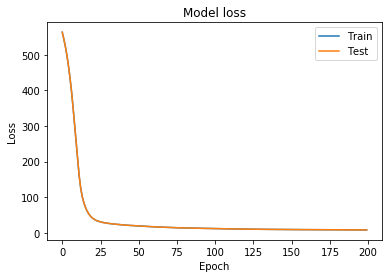

In [168]:
# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['mean_squared_error'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper right')
plt.show()

### Linear regression:

In [87]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [88]:
y_pred = model.predict(X_test)

In [99]:
# Let's compare our Accuracy:
print('Training data Linear Regression:',mean_squared_error(y_test, y_pred))

Training data Linear Regression: 23.19559925642301


## Use the Keras Library to build an image recognition network using the Fashion-MNIST dataset (also comes with keras)

- Load and preprocess the image data similar to how we preprocessed the MNIST data in class.
- Make sure to one-hot encode your category labels
- Make sure to have your final layer have as many nodes as the number of classes that you want to predict.
- Try different hyperparameters. What is the highest accuracy that you are able to achieve.
- Use the history object that is returned from model.fit to make graphs of the model's loss or train/validation accuracies by epoch. 
- Remember that neural networks fall prey to randomness so you may need to run your model multiple times (or use Cross Validation) in order to tell if a change to a hyperparameter is truly producing better results.

In [138]:
# Train and Test our set:
(X_train, y_train), (X_test, y_test) = fashion_mnist.load_data()

In [140]:
X_train.shape, X_test.shape

((60000, 28, 28), (10000, 28, 28))

In [141]:
# Reshaping our data into single vectors:
X_train = X_train.reshape(60000, 784)
X_test = X_test.reshape(10000, 784)

In [142]:
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')

In [143]:
# Correct Encoding on Y
# What softmax expects = [0,0,0,0,0,1,0,0,0,0]

# Thank you, Aaron! 1-10

y_train = keras.utils.to_categorical(y_train, num_classes=10)
y_test = keras.utils.to_categorical(y_test, num_classes=10)

In [144]:
fashion_model = Sequential()

# Input => Hidden
fashion_model.add(Dense(16, input_dim=784, activation='relu'))
# Hidden
fashion_model.add(Dense(16, activation='relu'))
# Hidden
fashion_model.add(Dense(16, activation='relu'))
# Hidden
fashion_model.add(Dense(16, activation='relu'))
# Output
fashion_model.add(Dense(10,activation='softmax'))

#Compile
fashion_model.compile(loss='categorical_crossentropy',
                    optimizer='adam',
                    metrics=['accuracy'])

fashion_model.summary()

Model: "sequential_16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_48 (Dense)             (None, 16)                12560     
_________________________________________________________________
dense_49 (Dense)             (None, 16)                272       
_________________________________________________________________
dense_50 (Dense)             (None, 16)                272       
_________________________________________________________________
dense_51 (Dense)             (None, 16)                272       
_________________________________________________________________
dense_52 (Dense)             (None, 10)                170       
Total params: 13,546
Trainable params: 13,546
Non-trainable params: 0
_________________________________________________________________


In [145]:
history = fashion_model.fit(X_train, y_train, batch_size=50000, epochs=100, validation_split=.1, verbose=1)
scores = fashion_model.evaluate(X_test, y_test)
print(f'{fashion_model.metrics_names[1]}: {scores[1]*100}')

Train on 54000 samples, validate on 6000 samples
Epoch 1/100
54000/54000 [==============================] - 1s 21us/sample - loss: 67.7542 - accuracy: 0.1010 - val_loss: 25.4460 - val_accuracy: 0.0963
Epoch 2/100
54000/54000 [==============================] - 0s 3us/sample - loss: 25.4379 - accuracy: 0.1004 - val_loss: 14.4849 - val_accuracy: 0.0957
Epoch 3/100
54000/54000 [==============================] - 0s 4us/sample - loss: 14.4134 - accuracy: 0.0959 - val_loss: 10.1945 - val_accuracy: 0.0960
Epoch 4/100
54000/54000 [==============================] - 0s 3us/sample - loss: 10.2937 - accuracy: 0.0915 - val_loss: 8.0892 - val_accuracy: 0.0983
Epoch 5/100
54000/54000 [==============================] - 0s 3us/sample - loss: 8.1971 - accuracy: 0.0987 - val_loss: 6.7925 - val_accuracy: 0.1170
Epoch 6/100
54000/54000 [==============================] - 0s 3us/sample - loss: 6.8267 - accuracy: 0.1177 - val_loss: 5.7797 - val_accuracy: 0.1350
Epoch 7/100
54000/54000 [========================

In [146]:
history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

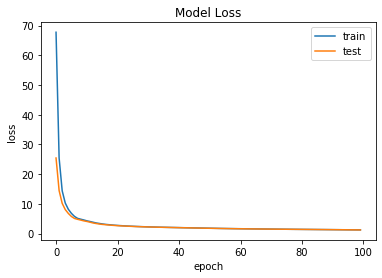

In [147]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper right')
plt.show()

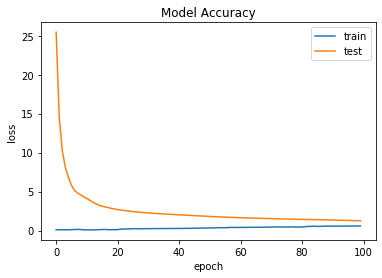

In [148]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_loss'])
plt.title('Model Accuracy')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper right')
plt.show()

## Stretch Goals:

- Use Hyperparameter Tuning to make the accuracy of your models as high as possible. (error as low as possible)
- Use Cross Validation techniques to get more consistent results with your model.
- Use GridSearchCV to try different combinations of hyperparameters. 
- Start looking into other types of Keras layers for CNNs and RNNs maybe try and build a CNN model for fashion-MNIST to see how the results compare.